# Step 5 NE204 Lab 1
## Height Finding Method Comparisons
__Dates: 08/2022 to 10/2022.__

__Group: Megan Schiferl, Chris Lamb, Curtis Berger, Jisu Park__

__Contents:__
This notebook takes in the height finding data from '4-HeightOptRoutine_Lab1_MS_NE204' and compares the methods for finding the height of the trapezoids. It is determined that the methods do not result in statistically significant photopeak channel locations or resolution, so the maximum height method is chosen going forward for it's speed. 

    Section 1: Imports
    Section 2: Functions
    Section 3: Plotting Height Finding Methods

__Notes on Running__
You'll need to change to your directory and load in the 3 files from step 4, but otherwise, run all!

# Section 1: Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import pandas as pd
from scipy import signal
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import os
from tqdm import notebook
import matplotlib.colors as mcolors
from decimal import Decimal

# Section 2: Functions

In [2]:
#Define a gaussian function for fitting 
def gauss(x, H, A, x0, sigma):
    # Gaussian signal shape
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

#using the gaussian function to fit signals 
def gauss_fit(x, y):
    # Fits gaussian and returns fit parameters
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

# Section 3: Ploting Height Finding Methods

In [3]:
# change directory
os.chdir(r'C:\Users\megas\Documents\Cal\NEFall2022\Detectors204\lab1\TrapHeightsFitOpt')

k = 950
m = 1000

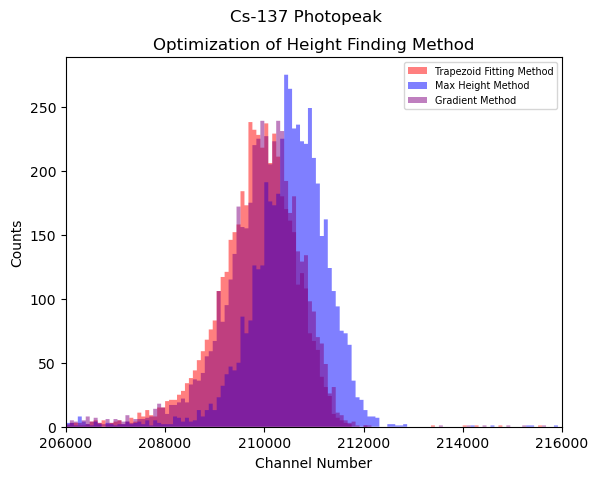

In [4]:
#Bring in the optimization data 
plt.figure()
plt.xlim(206000, 216000)
plt.suptitle("Cs-137 Photopeak")
plt.title("Optimization of Height Finding Method")
plt.xlabel("Channel Number")
plt.ylabel("Counts")

f1 = pd.read_csv("Cs137_2min_k950m1000_TrapFitMethod.csv")
f2 = pd.read_csv("Cs137_2min_k950m1000_MaxMethod.csv")
f3 = pd.read_csv("Cs137_2min_k950m1000_GradientMethod.csv")

spectrum1, bins1 = np.histogram(f1, bins=10000, range=(0,800000))
plt.hist(bins1[:-1], bins1, weights = spectrum1, histtype='stepfilled', color = 'r', alpha = 0.5, 
         label = "Trapezoid Fitting Method")

spectrum2, bins2 = np.histogram(f2, bins=10000, range=(0,800000))
plt.hist(bins2[:-1], bins2, weights = spectrum2, histtype='stepfilled', color = 'b', alpha = 0.5, 
         label = "Max Height Method")

spectrum3, bins3 = np.histogram(f3, bins=10000, range=(0,800000))
plt.hist(bins3[:-1], bins3, weights = spectrum3, histtype='stepfilled', color = 'purple', alpha = 0.5, 
         label = "Gradient Method")

plt.legend(fontsize = 'x-small')
plt.show()

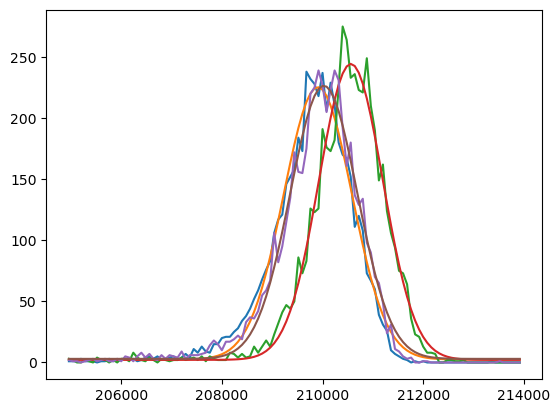

In [5]:
#Let's test out the fitting on just one peak
start1 = np.argmin(np.abs(bins1-205000))
end1 = np.argmin(np.abs(bins1-214000)) 

test_gauss1 = gauss_fit(bins1[start1:end1], spectrum1[start1:end1])
H1, A1, x01, sigma1 = test_gauss1
FWHM1 = 2.35482 * sigma1
res1 = (FWHM1/x01)*100 

test_gauss2 = gauss_fit(bins2[start1:end1], spectrum2[start1:end1])
H2, A2, x02, sigma2 = test_gauss2
FWHM2 = 2.35482 * sigma2
res2 = (FWHM2/x02)*100 

test_gauss3 = gauss_fit(bins3[start1:end1], spectrum3[start1:end1])
H3, A3, x03, sigma3 = test_gauss3
FWHM3 = 2.35482 * sigma3
res3 = (FWHM3/x03)*100 

plt.plot(bins1[start1:end1], spectrum1[start1:end1])
plt.plot(bins1[start1:end1], gauss(bins1[start1:end1], *test_gauss1))

plt.plot(bins2[start1:end1], spectrum2[start1:end1])
plt.plot(bins2[start1:end1], gauss(bins2[start1:end1], *test_gauss2))

plt.plot(bins3[start1:end1], spectrum3[start1:end1])
plt.plot(bins3[start1:end1], gauss(bins3[start1:end1], *test_gauss3))
plt.show()

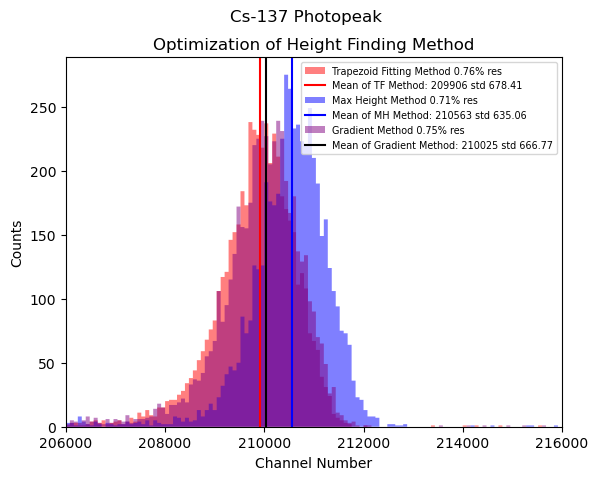

In [6]:
plt.figure()
plt.xlim(206000, 216000)
plt.suptitle("Cs-137 Photopeak")
plt.title("Optimization of Height Finding Method")
plt.xlabel("Channel Number")
plt.ylabel("Counts")


spectrum1, bins1 = np.histogram(f1, bins=10000, range=(0,800000))
plt.hist(bins1[:-1], bins1, weights = spectrum1, histtype='stepfilled', color = 'r', alpha = 0.5, 
         label = "Trapezoid Fitting Method {}% res".format(round(res1, 2)))

plt.axvline(x01, c='r', label = "Mean of TF Method: {} std {}".format(int(x01), round(sigma1, 2)))

spectrum2, bins2 = np.histogram(f2, bins=10000, range=(0,800000))
plt.hist(bins2[:-1], bins2, weights = spectrum2, histtype='stepfilled', color = 'b', alpha = 0.5, 
         label = "Max Height Method {}% res".format(round(res2, 2)))

plt.axvline(x02, c='b', label = "Mean of MH Method: {} std {}".format(int(x02), round(sigma2, 2)))

spectrum3, bins3 = np.histogram(f3, bins=10000, range=(0,800000))
plt.hist(bins3[:-1], bins3, weights = spectrum3, histtype='stepfilled', color = 'purple', alpha = 0.5, 
         label = "Gradient Method {}% res".format(round(res3,2)))


plt.axvline(x03, c='k', label = "Mean of Gradient Method: {} std {}".format(int(x03),round(sigma3,2)))

# plt.axhline(y=100, xmin = (216000-(x01-sigma1))/216000, xmax = (x01+sigma1)/216000, c='r')
plt.legend(fontsize = 'x-small')
plt.show()

<ErrorbarContainer object of 3 artists>

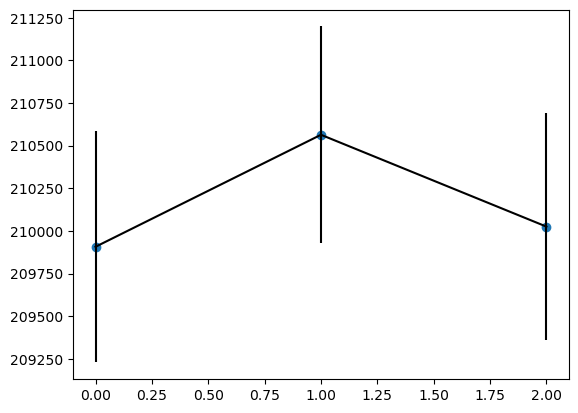

In [7]:
plt.figure()
plt.scatter([0,1,2],[x01,x02,x03])
c = [sigma1,sigma2,sigma3]
plt.errorbar([0,1,2],[x01,x02,x03], yerr=c, color = 'k')